In [1]:
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np

In [3]:
# pip install xgboost

In [4]:
# import xgboost as xgb

In [5]:
# Loading data
file_path = Path("Resources/prepped_cardio_data.csv")
cleaned_df = pd.read_csv(file_path)
cleaned_df = cleaned_df.drop(columns=["index"])
cleaned_df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Diabetes_num,Arthritis_Binary,Alcohol_outlier_treated,Fruit_outlier_treated,Green_Vegetables_outlier_treated,FriedPotato_outlier_treated
0,0,3,0,0,0,0,0,0,0,150.0,32.66,14.54,1,0,1,0.0,30.0,16.0,12.0
1,3,4,0,1,0,0,0,0,0,165.0,77.11,28.29,0,1,0,0.0,30.0,0.0,4.0
2,3,4,1,0,0,0,0,0,1,163.0,88.45,33.47,0,1,0,4.0,12.0,3.0,16.0
3,0,4,1,1,0,0,0,1,2,180.0,93.44,28.73,0,1,0,0.0,30.0,30.0,8.0
4,2,4,0,0,0,0,0,1,3,191.0,88.45,24.37,1,0,0,0.0,8.0,4.0,0.0


In [6]:
test_df = cleaned_df.copy()
test1_df = test_df[test_df['Heart_Disease']==1]
test_df = test_df[test_df['Heart_Disease']==0]
test_df = test_df.sample(n=24971)
test_df = pd.concat([test_df, test1_df]).sample(frac=1)
test_df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Diabetes_num,Arthritis_Binary,Alcohol_outlier_treated,Fruit_outlier_treated,Green_Vegetables_outlier_treated,FriedPotato_outlier_treated
254712,4,4,1,0,0,0,0,1,12,196.0,68.04,17.79,0,0,0,0.0,12.0,1.0,1.0
18844,3,4,1,0,0,0,0,0,6,175.0,106.59,34.70,0,0,0,15.0,12.0,20.0,3.0
122321,3,4,1,1,0,0,0,0,4,173.0,83.91,28.13,0,1,0,0.0,30.0,16.0,2.0
22698,4,4,1,0,0,0,0,1,1,178.0,86.18,27.26,0,0,0,15.0,4.0,8.0,4.0
215486,2,4,1,0,0,0,0,0,12,173.0,104.33,34.97,0,0,0,10.0,12.0,7.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308698,2,4,1,0,0,0,1,1,8,175.0,68.04,22.15,1,0,0,0.0,12.0,8.0,12.0
173551,0,4,0,1,0,1,0,1,0,165.0,73.48,26.96,0,0,1,0.0,57.0,20.0,1.0
288161,0,4,0,1,0,0,0,0,3,163.0,69.40,26.26,0,0,0,0.0,10.0,20.0,10.0
232184,2,4,0,1,0,0,1,0,9,175.0,94.35,30.72,1,0,1,0.0,30.0,1.0,8.0


In [7]:
# Define features set
X = test_df.copy()
X.drop("Heart_Disease", axis=1, inplace=True)
X.head()

,General_Health,Checkup,Exercise,Skin_Cancer,Other_Cancer,Depression,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Diabetes_num,Arthritis_Binary,Alcohol_outlier_treated,Fruit_outlier_treated,Green_Vegetables_outlier_treated,FriedPotato_outlier_treated
254712,4,4,1,0,0,0,1,12,196.0,68.04,17.79,0,0,0,0.0,12.0,1.0,1.0
18844,3,4,1,0,0,0,0,6,175.0,106.59,34.70,0,0,0,15.0,12.0,20.0,3.0
122321,3,4,1,0,0,0,0,4,173.0,83.91,28.13,0,1,0,0.0,30.0,16.0,2.0
22698,4,4,1,0,0,0,1,1,178.0,86.18,27.26,0,0,0,15.0,4.0,8.0,4.0
215486,2,4,1,0,0,0,0,12,173.0,104.33,34.97,0,0,0,10.0,12.0,7.0,8.0


In [8]:
# Define target vector
y = test_df["Heart_Disease"].values.reshape(-1, 1)
y[:5]

array([[0],
       [0],
       [1],
       [0],
       [0]], dtype=int64)

In [9]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [10]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [11]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [12]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [13]:
# Check for missing values.
import numpy as np
print(X_train.isnull().sum())
nan_in_y = np.isnan(y_train).any()
print(f'NaN values in y_train: {nan_in_y}')

General_Health                      0
Checkup                             0
Exercise                            0
Skin_Cancer                         0
Other_Cancer                        0
Depression                          0
Sex                                 0
Age_Category                        0
Height_(cm)                         0
Weight_(kg)                         0
BMI                                 0
Smoking_History                     0
Diabetes_num                        0
Arthritis_Binary                    0
Alcohol_outlier_treated             0
Fruit_outlier_treated               0
Green_Vegetables_outlier_treated    0
FriedPotato_outlier_treated         0
dtype: int64
NaN values in y_train: False


In [14]:
# Run Randomized Search for decision tree classifier.

param_grid = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'sqrt', 'log2']
}

random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_grid, n_iter=100, cv=5, random_state=42)
random_search.fit(X_train, y_train)
best_model_random = random_search.best_estimator_

## SIDE QUEST- USE XGBOOST TO OPITIMIZE MODEL.

In [15]:
# # Classify xgb model
# xgb_model = xgb.XGBClassifier( objective='binary:logistic', random_state=42 )

In [16]:
# #Use random search model with xgboost to opitmize decision tree model.
# from sklearn.model_selection import RandomizedSearchCV

# param_grid = {
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.1, 1, 5],
#     'n_estimators': [100, 500, 1000],
#     'colsample_bytree': [0.6, 1]
# }

# random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid, n_iter=20, cv=5, random_state=42)
# random_search.fit(X_train, y_train)
# best_model_xgb = random_search.best_estimator_

In [17]:
# # Fit model.
# model = best_model_random.fit(X_train_scaled, y_train)

In [18]:
# # Determine predicitons for the xgboosted model.
# predictions = best_model_xgb.predict(X_test)

In [19]:
# # Run confusion matrix for xgboos model.
# cm = confusion_matrix(y_test, predictions)
# cm_df = pd.DataFrame(
#     cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
# )

# # Calculating the accuracy score
# acc_score = accuracy_score(y_test, predictions)

In [20]:
# # Print classification report for xgboost model.
# print("Confusion Matrix")
# display(cm_df)
# print(f"Accuracy Score : {acc_score}")
# print("Classification Report")
# print(classification_report(y_test, predictions))

## SIDE QUEST Part. 2 RUN PREDICTIONS AND CONFUSION MATRIX ON TRAINING SET TO COMPARE TO THE ABOVE XGBOOST MODEL.

In [21]:
# # Determine predictions for xgboost model on the training set.
# predictions = best_model_xgb.predict(X_train)

In [22]:
# # Run confusion matrix for xgboost model on the training set.
# cm = confusion_matrix(y_train, predictions)
# cm_df = pd.DataFrame(
#     cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
# )

# # Calculating the accuracy score
# acc_score = accuracy_score(y_train, predictions)

In [23]:
# # Print classification matrix for xgboost model on the training set.
# print("Confusion Matrix")
# display(cm_df)
# print(f"Accuracy Score : {acc_score}")
# print("Classification Report")
# print(classification_report(y_train, predictions))

## Making Predictions Using the Random Search Decision Tree Model

In [24]:
# Calculate test scores and print.
test_score = best_model_random.score(X_test, y_test)
print(f'Test Score: {test_score}')

Test Score: 0.7416306263014576


In [25]:
# Making predictions using the testing data
# predictions = model.predict(X_test_scaled)

In [26]:
# Determine predictions for random search decision tree model.
predictions = best_model_random.predict(X_test)

## Model Evaluation

In [27]:
# Calculating the confusion matrix for random search decision tree model.
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [28]:
# Displaying results for random search decision tree model.
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report- Random Search Decision Tree Model")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,4410,1861
Actual 1,1365,4850


Accuracy Score : 0.7416306263014576
Classification Report- Random Search Decision Tree Model
              precision    recall  f1-score   support

           0       0.76      0.70      0.73      6271
           1       0.72      0.78      0.75      6215

    accuracy                           0.74     12486
   macro avg       0.74      0.74      0.74     12486
weighted avg       0.74      0.74      0.74     12486



In [29]:
# Find the important features from the random search model.
ftr_imp = best_model_random.feature_importances_
pd.DataFrame({'column': X_train.columns, 'ftr_imp': ftr_imp}).sort_values('ftr_imp', ascending=False)

,column,ftr_imp
7,Age_Category,0.514927
0,General_Health,0.327613
6,Sex,0.067444
12,Diabetes_num,0.044798
13,Arthritis_Binary,0.023976
11,Smoking_History,0.014955
1,Checkup,0.003074
17,FriedPotato_outlier_treated,0.001874
9,Weight_(kg),0.000686
8,Height_(cm),0.000653


In [30]:
unique_classes = np.unique(y)  # Use np.unique to get unique values
print("Unique Classes:", unique_classes)

# Define the class mapping
class_mapping = {0: 'No Heart Disease', 1: 'Heart Disease'}

# Create class names using a list comprehension with safe access
class_names = [class_mapping.get(i, f'Unknown Class {i}') for i in unique_classes]

print("Class Names:", class_names)

Unique Classes: [0 1]
Class Names: ['No Heart Disease', 'Heart Disease']


Feature Names: ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Sex', 'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History', 'Diabetes_num', 'Arthritis_Binary', 'Alcohol_outlier_treated', 'Fruit_outlier_treated', 'Green_Vegetables_outlier_treated', 'FriedPotato_outlier_treated']
Class Names: [['No Heart Disease', 'Heart Disease']]


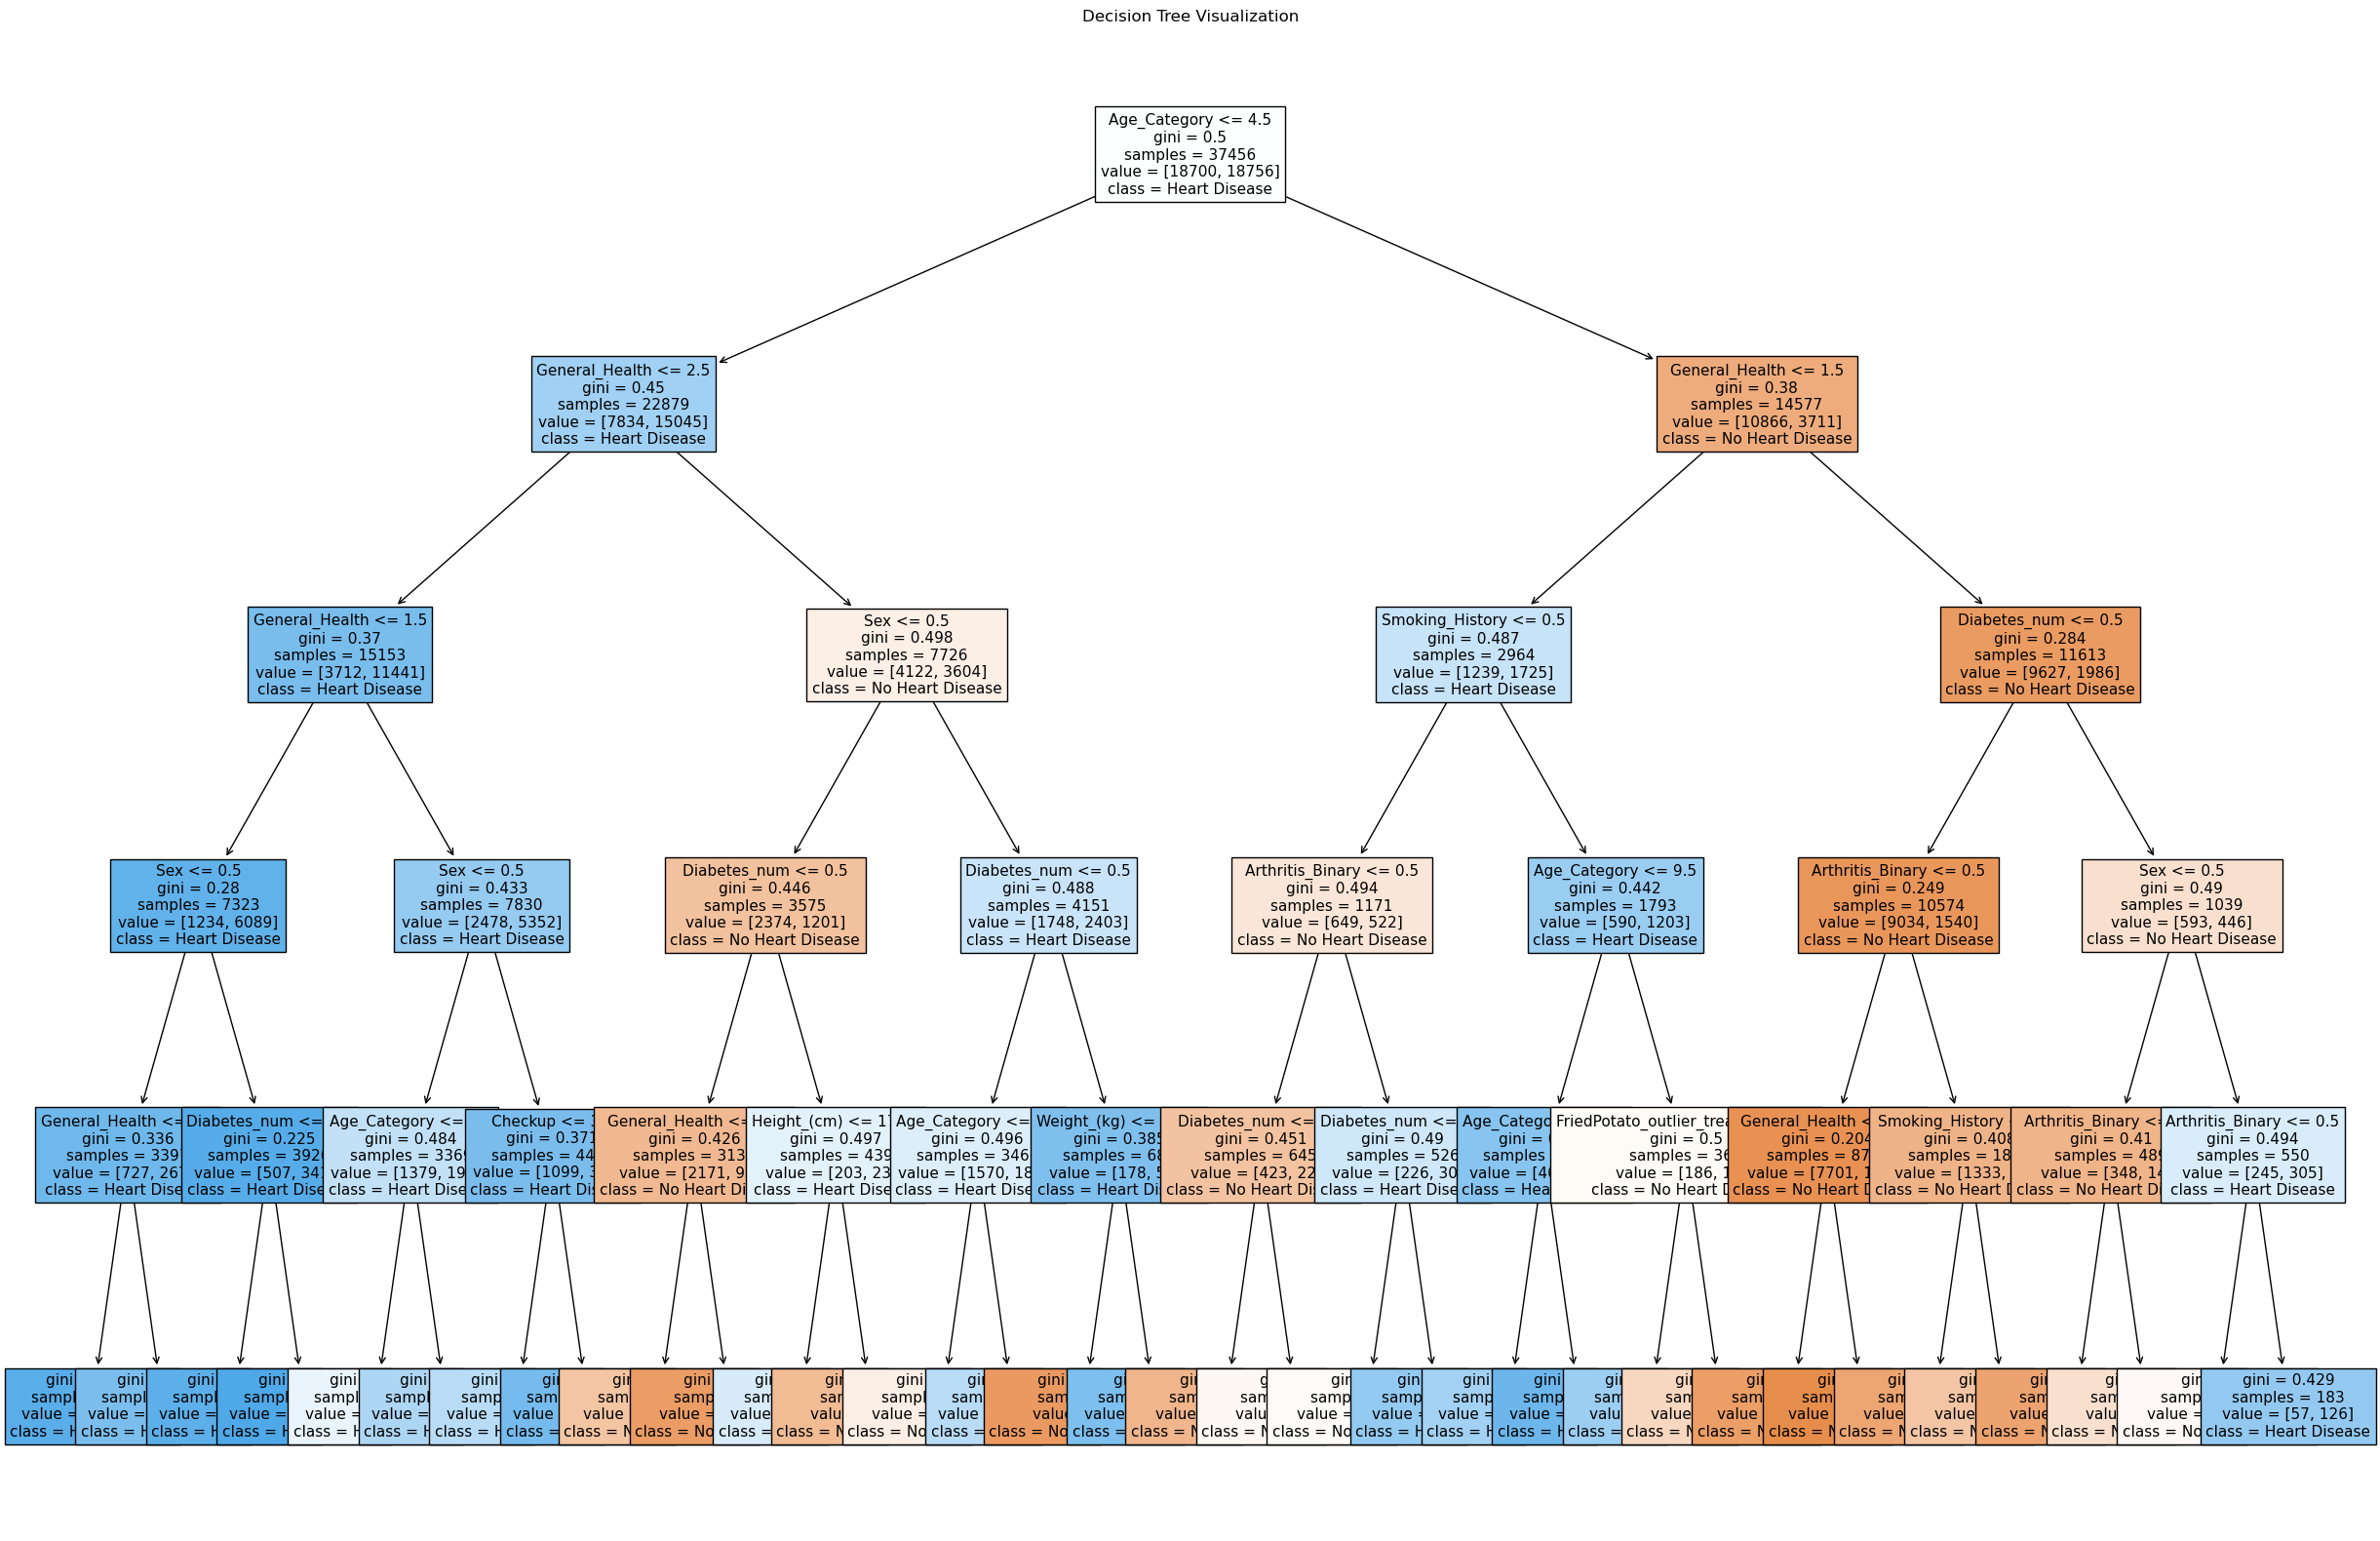

In [46]:
best_tree = random_search.best_estimator_
plt.ion()

plt.figure(figsize=(30, 20))
plot_tree(best_tree, filled=True, feature_names=X.columns, class_names=class_names, fontsize=11)  # Adjust class names as needed
plt.title('Decision Tree Visualization')

print("Feature Names:", X.columns.tolist())  # If X is a DataFrame
print("Class Names:", [class_names])  # Adjust according to your classes

plt.savefig('decision_tree.png', dpi=300)
plt.show()


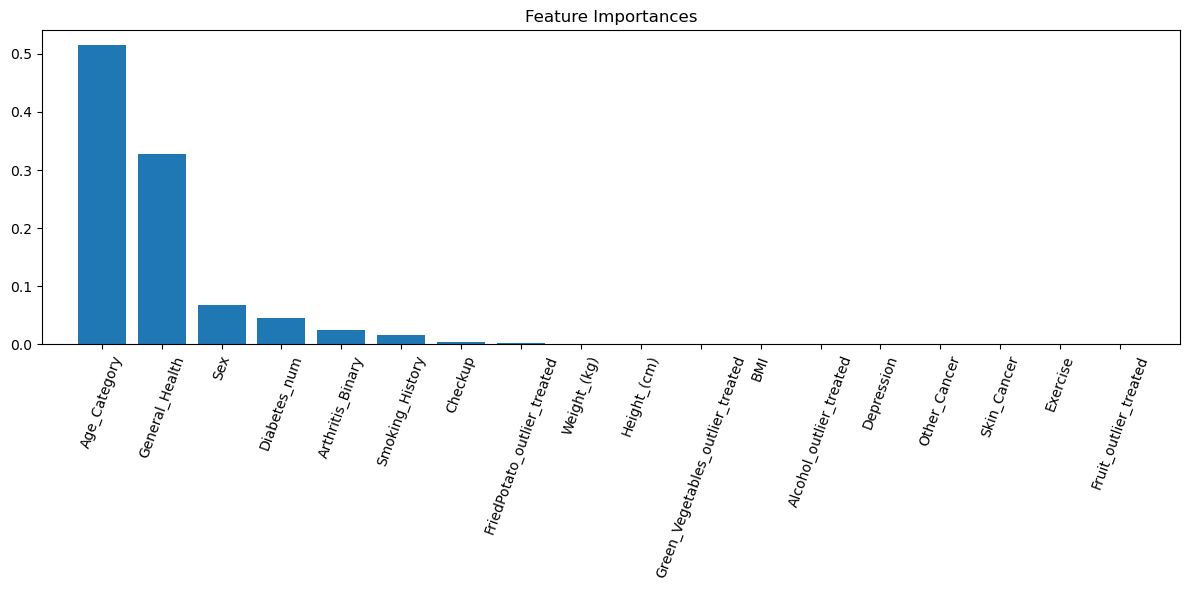

In [56]:
# Assuming best_tree is your trained decision tree model
feature_importances = best_tree.feature_importances_
feature_names = X.columns  # Assuming X is your features DataFrame

# Create a bar plot of feature importances
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=70)
plt.xlim([-1, X.shape[1]])

plt.tight_layout()

plt.savefig('feature_importances.png', bbox_inches='tight')

plt.show()